### 학습목표
- TextMining의 개념을 이해하고 관련된 기법을 활용해보자

#### 텍스트마이닝 프로세스
- TextMining : 비정형 텍스트 데이터에서 의미를 추출하는 작업

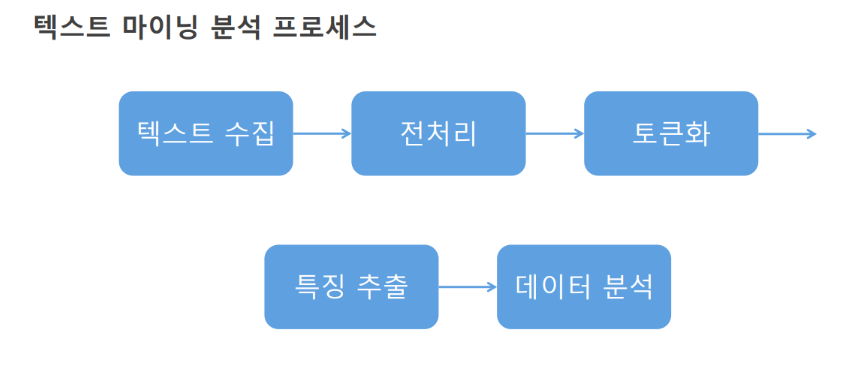

## 1. 단어빈도 분석
- 워드카운트 : 문장에 등장하는 단어의 빈도를 분석
- 말뭉치(corpus) : 분석에 활용할 문장 데이터셋
- 문서(document) : 말뭉치 내부에 들어있는 글 하나하나

#### 데이터셋 준비(네이버쇼핑 리뷰데이터)
- https://github.com/bab2min/corpus/tree/master/sentiment
- txt 파일

In [3]:
import os
os.chdir('./data/') # 작업디렉토리 변경

In [161]:
import pandas as pd
from tqdm import tqdm # 반복작업의 진행정도를 시각화하는 패키지

In [5]:
# csv 포멧 계열의 데이터지만 구분사를 \t로 구성하였음
naver_data = pd.read_csv('./naver_shopping.txt', delimiter='\t', header=None) # delimiter : 데이터 파싱할때 구분자를 설정
naver_data.head()  # 별점(긍부정), 리뷰(텍스트 데이터)

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [7]:
naver_data.columns = ['score','review']
naver_data.head()

,score,review
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [25]:
# 문서 개수 확인하기
naver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   score   200000 non-null  int64 
 1   review  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [9]:
# 리뷰데이터만 추출하기
naver_review = naver_data['review']
naver_review.head()

0                                              배공빠르고 굿
1                        택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2    아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3    선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                    민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
Name: review, dtype: object

In [11]:
# 토큰화 : 문서의 텍스트를 특정 기준으로 쪼개주는 작업
# 기본이되는 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize
import nltk
# nltk.download('punkt') # 문장부호를 인식하도록 다운로드
nltk.download('punkt_tab') # 문장부호를 인식하도록 다운로드

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lgdxschool2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
# 토큰화 테스트
word_tokenize('택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고')

['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고']

In [101]:
# 전체 문서를 토큰화
token_list = []

for doc in tqdm(naver_review):  # 20만개의 리뷰를 반복
    token_list += word_tokenize(doc)

print(token_list)

100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [00:07<00:00, 26386.30it/s]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [102]:
len(token_list)   # 190만개

1901794

In [89]:
print(token_list[:8])  #==> 단어로 들어감

['배공빠르고', '굿', '택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고']


In [13]:
token_list = [word_tokenize(doc) for doc in naver_review]

In [14]:
print(token_list[:2])  # ==> 이중리스트 형태

[['배공빠르고', '굿'], ['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고']]


In [15]:
len(token_list)  # 20만개

200000

#### 전체 문서를 토큰화 한 줄로!!

In [154]:
# 전체 문서를 토큰화 var2
token_list = [token for doc in naver_review for token in word_tokenize(doc)]

In [155]:
len(token_list) # 135개

1901794

In [49]:
token_list

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '좋아서2개',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다',
 '.',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요',
 '.',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다',
 '.',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요',
 '..',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요',
 '..',
 '이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요',
 '..',
 '민트색상',
 '예뻐요',
 '.',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 'ㅎㅎ',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 'ㅠㅠ',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다',
 '.',
 '주문을',
 '11월6에',
 '시켰는데',
 '11월16일에',
 '배송이',
 '왔네요',
 'ㅎㅎㅎ',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '안나네요~',
 '110인데',
 '전문속옷브랜드',
 '위생팬티105보다',
 '작은듯해요',
 '.',


In [50]:
# 빈도세기
from collections import Counter # 데이터의 갯수를 세는 도구

In [51]:
counter = Counter(token_list)  # 같은 단어 묶음 세기
counter.most_common(40) # 빈도 높은 상위 단어 40개

[('.', 72602),
 ('!', 26404),
 ('..', 25021),
 ('너무', 22220),
 ('잘', 17987),
 ('...', 15237),
 ('좋아요', 14719),
 ('재구매', 13832),
 (',', 12358),
 ('그냥', 9962),
 ('?', 8624),
 ('좀', 8469),
 ('다', 7143),
 ('많이', 6636),
 ('더', 6551),
 ('생각보다', 6199),
 (';', 5447),
 ('배송도', 5333),
 ('같아요', 5125),
 ('배송', 4927),
 ('정말', 4714),
 ('ㅠㅠ', 4287),
 ('좋네요', 4277),
 ('빠르고', 3964),
 ('좋습니다', 3788),
 ('진짜', 3763),
 ('샀는데', 3739),
 ('배송이', 3712),
 ('아주', 3659),
 ('만족합니다', 3481),
 ('....', 3461),
 ('또', 3389),
 ('넘', 3318),
 ('조금', 3121),
 ('딱', 3040),
 ('것', 2931),
 ('ㅎㅎ', 2885),
 ('완전', 2867),
 ('아직', 2862),
 ('좋고', 2798)]

In [24]:
# 재구매라는 단어가 들어간 문장을 boolean색인 해보자
재구매_df = naver_data[naver_data['review'].str.contains('재구매')]
재구매_df

,score,review
16,5,재구매 친구들이 좋은 향 난다고 해요
18,4,재구매 다 좋은데 하나가 이상하네요
24,5,재구매 늘 사는 흙이에요 팽이들이 젤 좋아해요 빠른배송 감사합니다
55,2,재구매 짱구오빠네 소개로 이용했는데 저번엔 괜찮은거 같아서 또 샀는데 기름만 엄청 ...
62,5,재구매 가게에서 사용중입니다. 안주디피할때 이쁩니다.
...,...,...
199946,2,재구매 두번째 시키는건데 항상보면 물건에 검정색 이물질이 묻어난게 많네요 지워지지도 않고
199949,5,재구매 ㅎㅎ자주 애용하고있습니당
199952,5,재구매 매번주문하는데 이번에도 잘구매했어요ㅎㅎ
199971,5,재구매 로션보단 크림이 더 보습이 좋아요^^


#### 재구매와 연관된 단어를 파악해보자

In [58]:
token_list = [token for doc in 재구매_df['review'] for token in word_tokenize(doc)]
counter = Counter(token_list)  # 같은 단어 묶음 세기
counter.most_common(40) # 빈도 높은 상위 단어 20개

[('재구매', 13832),
 ('.', 5797),
 ('!', 2490),
 ('너무', 1526),
 ('좋아요', 1479),
 ('..', 1409),
 ('잘', 1304),
 (',', 857),
 ('...', 810),
 ('항상', 744),
 ('또', 580),
 ('다', 571),
 ('배송도', 508),
 ('많이', 498),
 ('더', 498),
 ('좀', 465),
 ('?', 465),
 ('빠르고', 462),
 ('배송', 442),
 ('늘', 413),
 ('계속', 399),
 ('정말', 384),
 ('있어요', 381),
 ('그냥', 365),
 ('맛있어요', 363),
 ('좋아서', 350),
 ('좋습니다', 348),
 ('감사합니다', 339),
 ('만족합니다', 338),
 ('두번째', 331),
 ('아주', 324),
 ('배송이', 317),
 ('있습니다', 313),
 ('같아요', 303),
 ('넘', 290),
 ('좋고', 287),
 (';', 282),
 ('먹고', 278),
 ('매번', 271),
 ('다시', 259)]

- 항상, 또 와 같은 다회성 경험과 배송이 관련이 있는 것으로 추측됨

### 워드 클라우드
- 단어의 빈도에 따라서 크기를 다르게 시각화하는 방법

In [34]:
# 관련 라이브러리 설치
!pip install wordcloud

In [36]:
# 워드클라우드 수행 도구 생성
from wordcloud import WordCloud

In [108]:
# 워드클라우드 이미지 생성역할
wc = WordCloud(background_color='#C2E5F2', random_state=109,  # 배경색 설정, 난수 고정->매번 같은 클라우드 그림 생성
               font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf') # 한글폰트 설정

In [92]:
counter.most_common(40) # 빈도 높은 상위 단어 40개

[('재구매', 13832),
 ('.', 5797),
 ('!', 2490),
 ('너무', 1526),
 ('좋아요', 1479),
 ('..', 1409),
 ('잘', 1304),
 (',', 857),
 ('...', 810),
 ('항상', 744),
 ('또', 580),
 ('다', 571),
 ('배송도', 508),
 ('많이', 498),
 ('더', 498),
 ('좀', 465),
 ('?', 465),
 ('빠르고', 462),
 ('배송', 442),
 ('늘', 413),
 ('계속', 399),
 ('정말', 384),
 ('있어요', 381),
 ('그냥', 365),
 ('맛있어요', 363),
 ('좋아서', 350),
 ('좋습니다', 348),
 ('감사합니다', 339),
 ('만족합니다', 338),
 ('두번째', 331),
 ('아주', 324),
 ('배송이', 317),
 ('있습니다', 313),
 ('같아요', 303),
 ('넘', 290),
 ('좋고', 287),
 (';', 282),
 ('먹고', 278),
 ('매번', 271),
 ('다시', 259)]

In [94]:
# 빈도가 측정된 데이터로 클라우드 그림 그리기
freq_data = counter.most_common(40)
# 데이터 구조 -> {'단어':'빈도','단어':'빈도'...}
freq_dict = {k:v for k,v in freq_data}
freq_dict

{'재구매': 13832,
 '.': 5797,
 '!': 2490,
 '너무': 1526,
 '좋아요': 1479,
 '..': 1409,
 '잘': 1304,
 ',': 857,
 '...': 810,
 '항상': 744,
 '또': 580,
 '다': 571,
 '배송도': 508,
 '많이': 498,
 '더': 498,
 '좀': 465,
 '?': 465,
 '빠르고': 462,
 '배송': 442,
 '늘': 413,
 '계속': 399,
 '정말': 384,
 '있어요': 381,
 '그냥': 365,
 '맛있어요': 363,
 '좋아서': 350,
 '좋습니다': 348,
 '감사합니다': 339,
 '만족합니다': 338,
 '두번째': 331,
 '아주': 324,
 '배송이': 317,
 '있습니다': 313,
 '같아요': 303,
 '넘': 290,
 '좋고': 287,
 ';': 282,
 '먹고': 278,
 '매번': 271,
 '다시': 259}

In [110]:
wc_rs = wc.generate_from_frequencies(freq_dict) # 이미지 생성

In [112]:
# 생성된 그림을 시각화
import matplotlib.pyplot as plt
plt.rc('font',family='LG_Smart_UI-SemiBold') # 시각화 도구에 한글폰트 설정

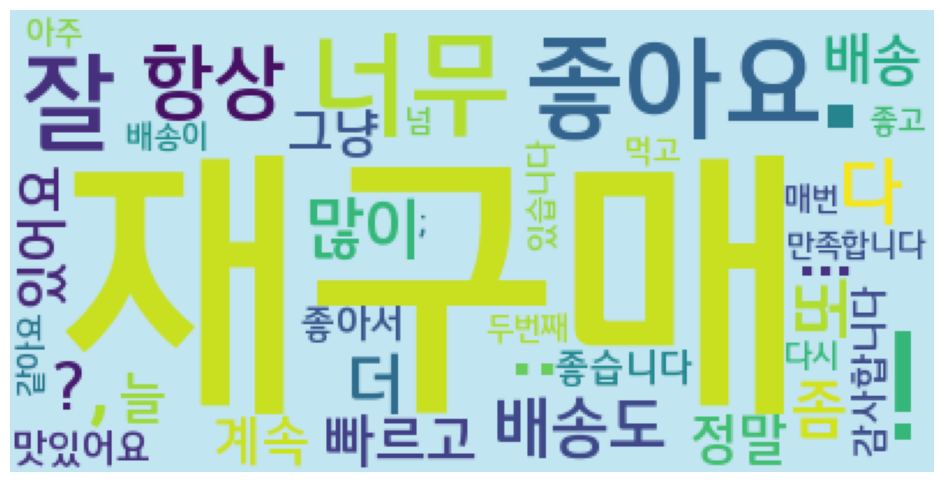

In [116]:
plt.figure(figsize=(16,6)) # 그림판 생성
plt.imshow(wc_rs) # 그림을 그리는 함수
plt.axis('off') # x,y축 안보이게
plt.show() # 그림을 보여주세요

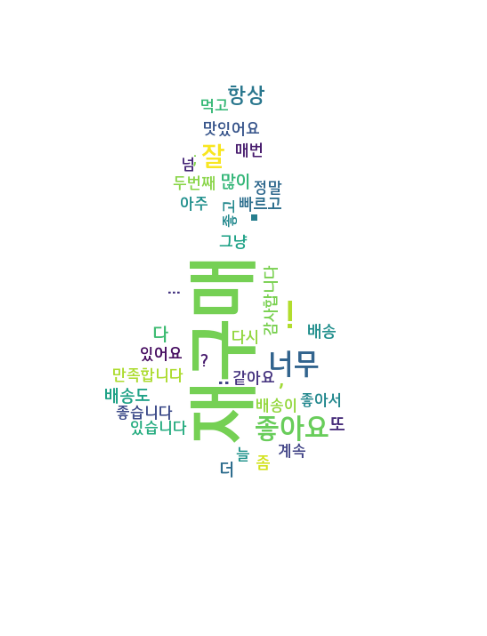

In [141]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

img = Image.open('./Alice.jpg')
imgArray = np.array(img)

# 워드클라우드 이미지 생성역할
wc = WordCloud(background_color='white', random_state=109,  # 배경색 설정, 난수 고정->매번 같은 클라우드 그림 생성
               font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf', mask=imgArray) # 한글폰트 설정

wc_rs = wc.generate_from_frequencies(freq_dict) # 이미지 생성

plt.figure(figsize=(8,8)) # 그림판 생성
plt.imshow(wc_rs) # 그림을 그리는 함수
plt.axis('off') # x,y축 안보이게
plt.show() # 그림을 보여주세요

## 2. 텍스트 데이터 전처리

### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- ㅎㅎㅎ, ㅋㅋㅋㅋㅋ,ㅋㅋ, ... 등 특정한 패턴을 지정하여 출력, 추출, 삭제할 수 있다
- 핸드폰번호, 이메일주소 검출시에도 활용 가능
- https://wikidocs.net/21703

In [143]:
import re # 정규표현식을 사용할 수 있는 모듈

In [147]:
# 핸드폰번호 검출 예시
p = re.compile("010-?[0-9]{4}-?\\d{4}") # 패턴생성 -? : -이 있을수도 있고 없을 수도 있다

p.search("전화번호 : 010-1234-5678") # match 확인

<re.Match object; span=(7, 20), match='010-1234-5678'>

In [149]:
p.search("전화번호 : 010-1245678")

- 매칭되는 값이 없다

In [151]:
p.search("전화번호 : 010-12345678")

<re.Match object; span=(7, 19), match='010-12345678'>

-----

In [175]:
# 데이터 클렌징
# !.,?ㅋㅎㅇ~0-9a-z
# 패턴생성
p = re.compile("[!.,?;)(:ㅡㅋㅎㅇㅠㅜ\\^~0-9a-zA-Z]+")  # 하나라도 있으면 매칭, + :앞의 문자가 최소 한 개 이상 존재합니다. (문자가 1개 이상)
review_clean = [] # 전처리된 전체 텍스트를 담을 리스트

for doc in tqdm(naver_review): #20만개 리뷰 반복
    # 토큰화 실시
    token_list = []
    for tokens in word_tokenize(doc): # 개별문서를 토큰화
        if p.search(tokens): # 단어토큰이 패턴에 매칭이 된다면
            continue
        token_list.append(tokens)
    review_clean.append(token_list)

review_clean

100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [00:09<00:00, 20893.91it/s]


[['배공빠르고', '굿'],
 ['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고'],
 ['아주좋아요',
  '바지',
  '정말',
  '더',
  '구매했어요',
  '이가격에',
  '대박입니다',
  '바느질이',
  '조금',
  '엉성하긴',
  '하지만',
  '편하고',
  '가성비',
  '최고예요'],
 ['선물용으로',
  '빨리',
  '받아서',
  '전달했어야',
  '하는',
  '상품이었는데',
  '머그컵만',
  '와서',
  '당황했습니다',
  '전화했더니',
  '바로주신다했지만',
  '배송도',
  '누락되어있었네요',
  '확인안하고',
  '바로',
  '선물했으면',
  '큰일날뻔했네요',
  '이렇게',
  '배송이',
  '오래걸렸으면',
  '사는거',
  '다시',
  '생각했을거같아요',
  '아쉽네요'],
 ['민트색상', '예뻐요', '옆', '손잡이는', '거는', '용도로도', '사용되네요'],
 ['비추합니다',
  '계란',
  '뒤집을',
  '때',
  '완전',
  '불편해요',
  '코팅도',
  '묻어나고',
  '보기엔',
  '예쁘고',
  '실용적으로',
  '보였는데',
  '생각보다',
  '진짜',
  '별로입니다'],
 ['주문을',
  '시켰는데',
  '배송이',
  '왔네요',
  '여기',
  '회사측과는',
  '전화도',
  '안되고',
  '아무런',
  '연락을',
  '받을수가',
  '없으니',
  '답답하신',
  '분들은',
  '다른곳에서',
  '사시는거',
  '추천드립니다'],
 ['넉넉한', '길이로', '주문했는데도', '안', '맞네요', '별로예요'],
 ['보폴이', '계속', '때처럼', '나오다가', '지금은'],
 ['전문속옷브랜드',
  '작은듯해요',
  '불편해요',
  '밴딩부분이',
  '다',
  '신축성없는',
  '일반실로',
  '되어있어',
  '빅사이즈임에도',
  '빅사이즈같

In [177]:
# clean 데이터로 워드카운트
review_clean2 = [w for doc in review_clean for w in doc]
review_clean2

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요',
 '이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요',
 '민트색상',
 '예뻐요',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다',
 '주문을',
 '시켰는데',
 '배송이',
 '왔네요',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '전문속옷브랜드',
 '작은듯해요',
 '불편해요',
 '밴딩부분이',
 '다',
 '신축성없는',
 '일반실로',
 '되어있어',
 '빅사이즈임에도',
 '빅사이즈같지않아요',
 '입고벗을때',
 '편하게',
 '밴딩부분이',
 '늘어나고',
 '입었을때도',
 '밴딩이',
 '잡아주어야하는데'

In [179]:
len(review_clean2)

1615345

In [181]:
counter_clean = Counter(review_clean2)
counter_clean.most_common(100)

[('너무', 22220),
 ('잘', 17987),
 ('좋아요', 14719),
 ('재구매', 13832),
 ('그냥', 9962),
 ('좀', 8469),
 ('다', 7143),
 ('많이', 6636),
 ('더', 6551),
 ('생각보다', 6199),
 ('배송도', 5333),
 ('같아요', 5125),
 ('배송', 4927),
 ('정말', 4714),
 ('좋네요', 4277),
 ('빠르고', 3964),
 ('좋습니다', 3788),
 ('진짜', 3763),
 ('샀는데', 3739),
 ('배송이', 3712),
 ('아주', 3659),
 ('만족합니다', 3481),
 ('또', 3389),
 ('넘', 3318),
 ('조금', 3121),
 ('딱', 3040),
 ('것', 2931),
 ('완전', 2867),
 ('아직', 2862),
 ('좋고', 2798),
 ('엄청', 2739),
 ('감사합니다', 2714),
 ('다시', 2502),
 ('다른', 2496),
 ('있어요', 2394),
 ('제품', 2361),
 ('가격대비', 2331),
 ('안', 2298),
 ('구매했는데', 2280),
 ('주문했는데', 2216),
 ('있어서', 2130),
 ('제가', 2111),
 ('맘에', 2096),
 ('계속', 2085),
 ('했는데', 2079),
 ('바로', 2046),
 ('냄새가', 1996),
 ('배송은', 1989),
 ('않고', 1969),
 ('항상', 1922),
 ('그리고', 1916),
 ('합니다', 1900),
 ('수', 1873),
 ('마음에', 1858),
 ('맛있어요', 1849),
 ('그래도', 1820),
 ('근데', 1770),
 ('맛이', 1758),
 ('있습니다', 1744),
 ('귀찮아서', 1743),
 ('별로', 1725),
 ('좋은', 1686),
 ('해서', 1685),
 ('왔어요', 1685),
 ('사

### 형태소 분석기 활용
- konlpy
- pororo
- kiwi : https://github.com/bab2min/kiwipiepy

In [185]:
!pip install kiwipiepy

     ---------------------------------------- 0.0/34.7 MB ? eta -:--:--
     -- ------------------------------------- 2.1/34.7 MB 11.8 MB/s eta 0:00:03
     ----- ---------------------------------- 4.7/34.7 MB 11.9 MB/s eta 0:00:03
     ------- -------------------------------- 6.8/34.7 MB 11.3 MB/s eta 0:00:03
     --------- ------------------------------ 8.1/34.7 MB 10.5 MB/s eta 0:00:03
     ------------ -------------------------- 10.7/34.7 MB 10.3 MB/s eta 0:00:03
     -------------- ------------------------ 13.1/34.7 MB 10.5 MB/s eta 0:00:03
     ----------------- --------------------- 15.5/34.7 MB 10.7 MB/s eta 0:00:02
     -------------------- ------------------ 18.1/34.7 MB 10.9 MB/s eta 0:00:02
     ---------------------- ---------------- 20.4/34.7 MB 10.9 MB/s eta 0:00:02
     ------------------------- ------------- 22.3/34.7 MB 10.8 MB/s eta 0:00:02
     -------------------------- ------------ 23.9/34.7 MB 10.4 MB/s eta 0:00:02
     ----------------------------- --------- 26.

In [190]:
from kiwipiepy import Kiwi
Kiwi = Kiwi() # 형태소 분석기 도구 생성

In [200]:
# 형태소단위로 추출
rs = Kiwi.tokenize("아버지 가방에 들어가신다.")
rs

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가방', tag='NNG', start=4, len=2),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2),
 Token(form='.', tag='SF', start=13, len=1)]

- tag : 품사 / NNG : 일반 명사

In [204]:
for t in rs:
    print(t.form)

아버지
가방
에
들어가
시
ᆫ다
.


In [206]:
for t in rs:
    print(t.tag)

NNG
NNG
JKB
VV
EP
EF
SF


In [208]:
for t in rs:
    if t.tag in ['NNG','VV', 'VA']:  # 일반명사, 동사, 형용사
        print(t.form)

아버지
가방
들어가


In [211]:
# 형태소 분석 후 워드카운트
# 명사, 동사, 형용사
review_clean

[['배공빠르고', '굿'],
 ['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고'],
 ['아주좋아요',
  '바지',
  '정말',
  '더',
  '구매했어요',
  '이가격에',
  '대박입니다',
  '바느질이',
  '조금',
  '엉성하긴',
  '하지만',
  '편하고',
  '가성비',
  '최고예요'],
 ['선물용으로',
  '빨리',
  '받아서',
  '전달했어야',
  '하는',
  '상품이었는데',
  '머그컵만',
  '와서',
  '당황했습니다',
  '전화했더니',
  '바로주신다했지만',
  '배송도',
  '누락되어있었네요',
  '확인안하고',
  '바로',
  '선물했으면',
  '큰일날뻔했네요',
  '이렇게',
  '배송이',
  '오래걸렸으면',
  '사는거',
  '다시',
  '생각했을거같아요',
  '아쉽네요'],
 ['민트색상', '예뻐요', '옆', '손잡이는', '거는', '용도로도', '사용되네요'],
 ['비추합니다',
  '계란',
  '뒤집을',
  '때',
  '완전',
  '불편해요',
  '코팅도',
  '묻어나고',
  '보기엔',
  '예쁘고',
  '실용적으로',
  '보였는데',
  '생각보다',
  '진짜',
  '별로입니다'],
 ['주문을',
  '시켰는데',
  '배송이',
  '왔네요',
  '여기',
  '회사측과는',
  '전화도',
  '안되고',
  '아무런',
  '연락을',
  '받을수가',
  '없으니',
  '답답하신',
  '분들은',
  '다른곳에서',
  '사시는거',
  '추천드립니다'],
 ['넉넉한', '길이로', '주문했는데도', '안', '맞네요', '별로예요'],
 ['보폴이', '계속', '때처럼', '나오다가', '지금은'],
 ['전문속옷브랜드',
  '작은듯해요',
  '불편해요',
  '밴딩부분이',
  '다',
  '신축성없는',
  '일반실로',
  '되어있어',
  '빅사이즈임에도',
  '빅사이즈같

In [213]:
for doc in review_clean[:10]: # 1차 클렌징한 데이터를 반복
    # 하나의 doc을 한 문장으로 병합
    doc_merge = ' '.join(doc)
    print(doc_merge)

배공빠르고 굿
택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
아주좋아요 바지 정말 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요
선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화했더니 바로주신다했지만 배송도 누락되어있었네요 확인안하고 바로 선물했으면 큰일날뻔했네요 이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요
민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요
비추합니다 계란 뒤집을 때 완전 불편해요 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다
주문을 시켰는데 배송이 왔네요 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다
넉넉한 길이로 주문했는데도 안 맞네요 별로예요
보폴이 계속 때처럼 나오다가 지금은
전문속옷브랜드 작은듯해요 불편해요 밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요 입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠


In [223]:
review_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(review_clean): # 1차 클렌징한 데이터를 반복
    # 하나의 doc을 한 문장으로 병합
    doc_merge = ' '.join(doc)
    # 형태소 분석
    doc_merphs = Kiwi.tokenize(doc_merge)
    # 일반명사, 동사, 형용사만 추출

    morphs_list = []
    for t in doc_merphs: # 분리된 문서의 토큰을 반복
        if t.tag in ['NNG','VV', 'VA']:
            morphs_list.append(t.form)
    # print(' '.join(morphs_list))
    review_clean_morphs.append(' '.join(morphs_list))

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [02:49<00:00, 1177.20it/s]


In [225]:
review_clean_morphs

['공 빠르 굿',
 '택배 엉망 집 밑 층 말 놔두 가',
 '좋 바지 구매 가격 박 바느질 편하 가성비 최고',
 '선물 전달 상품 컵 오 당황 전화 주 하 배송 누락 확인 하 선물 큰일 나 배송 걸리 사 생각 같',
 '민트 색상 예쁘 옆 손잡이 용도 사용',
 '추하 계란 때 완전 불편 코팅 묻어나 보 예쁘 실용 보이 생각',
 '주문 시키 배송 오 회사 전화 되 연락 없 곳 사 추천 드리',
 '길이 주문 맞',
 '보 폴 때 나오 지금',
 '전문 속옷 브랜드 작 불편 밴딩 부분 신축 없 일반 실 되 빅 사이즈 빅 사이즈 같 때 편하 배 부분 늘어나 때 말',
 '사이즈 좋',
 '베이지 색 구매 하 살색',
 '화면 빨 컬러 돋보이 저렴하 맛 쓰',
 '',
 '촉감 좋 무게감 핏 편하',
 '불 멍 좋 사이즈 좋',
 '구매 친구 좋 향 나 하',
 '실내 신 모르',
 '구매 좋 이상',
 '가게 운영 사장 대신 구매 하 구매 되 가게 달 이쁘',
 '가성비 괜찮 바퀴 고정',
 '화장 지우 거품 생기 오랫동안 문지르 정력 하',
 '남자 애 좋 유하 성분 없 초등 바르 좋',
 '채집 통 결 착 되 채집 통 결 착 되 결착 부분 모서리 부분 깍 결 부분 제품 불량 이슈 같 보내 전 최소한 테스트 하 보내',
 '구매 사 흙 팽이 좋아하 빠르 배송 감사',
 '쓰 때 좋 쓰 의자 빼 때 소리 나 붙이 직 덧붙이 끌리 살 이쁘 사 사 후회되요',
 '배송 기사 판매 회사 친절 서비스 면 최악 제품 쓰 싸 지 떡 마인드 갖추 장사 바라 이익 눌',
 '저렴하 구매 바지 완성도',
 '사용 불편',
 '양 많 맛 없',
 '설치 때 전압 높 퓨즈 나가',
 '첨 때 칸막이 있 맘 들 지금 맘 들 먼지 먼지 집 두 들 까만색 아이보리 살',
 '휴대폰 각 나오 사용 얇 케이스 끄 빠지 불편 각도 조절 되 점',
 '생각 고급',
 '좋 옵션 파우치 있 좋 구매 사용',
 '총 사 사용 전 닦 프린트 번지 교환 귀찮 쓰',
 '모기 않들어가요ᆢ',
 '

In [227]:
# 토큰화
token_list_morphs = [t for doc in review_clean_morphs for t in word_tokenize(doc)]
len(token_list_morphs)

1381027

In [229]:
counter_morphs = Counter(token_list_morphs)
counter_morphs.most_common(100)

[('좋', 55214),
 ('하', 32446),
 ('구매', 31186),
 ('쓰', 28493),
 ('배송', 27516),
 ('같', 20348),
 ('사', 19859),
 ('먹', 18105),
 ('되', 17595),
 ('있', 16433),
 ('없', 14908),
 ('빠르', 13988),
 ('사용', 13933),
 ('오', 13363),
 ('제품', 11720),
 ('생각', 11007),
 ('가격', 10879),
 ('나', 10016),
 ('주문', 9993),
 ('만족', 9750),
 ('맛', 8803),
 ('때', 8701),
 ('크', 7878),
 ('들', 7695),
 ('사이즈', 7504),
 ('작', 7387),
 ('포장', 6836),
 ('맛있', 6276),
 ('맞', 6152),
 ('보', 6042),
 ('상품', 5891),
 ('괜찮', 5475),
 ('보내', 5316),
 ('부분', 5274),
 ('싸', 5266),
 ('냄새', 5223),
 ('편하', 5066),
 ('이쁘', 5050),
 ('모르', 4557),
 ('가', 4392),
 ('알', 4361),
 ('저렴하', 4295),
 ('예쁘', 4223),
 ('많', 4223),
 ('감사', 4135),
 ('주', 4032),
 ('반품', 4032),
 ('구입', 3976),
 ('느낌', 3965),
 ('보이', 3902),
 ('시키', 3862),
 ('맘', 3790),
 ('불편', 3750),
 ('나오', 3644),
 ('아이', 3571),
 ('정도', 3567),
 ('떨어지', 3521),
 ('살', 3445),
 ('넣', 3348),
 ('사진', 3259),
 ('색', 3251),
 ('물', 3197),
 ('디자인', 3192),
 ('전', 3142),
 ('효과', 3098),
 ('다르', 3053),
 ('상태', 3037),
 (

### 띄어쓰기 교정
- https://bab2min.github.io/kiwipiepy/v0.15.0/kr/#kiwipiepy.Kiwi.space

In [239]:
Kiwi.space("띄어쓰기없이작성된텍스트네이걸교정해줘")

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해 줘'

In [241]:
Kiwi.space("아버지가방에들어가신다")

'아버지가 방에 들어가신다'

### 불용어처리(stop word)
- 분석시 필요없는, 의미가 없는 토큰들을 제거하는 행위

In [244]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords() # 불용어처리 도구 생성

In [246]:
Kiwi.tokenize('분석 결과에서 불용어만 제외하고 출력할 수도 있다.', stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

- 은/는/에서/을 등을 삭제

In [250]:
# 불용어 등록
stopwords.add(('결과','NNG'))
Kiwi.tokenize('분석 결과에서 불용어만 제외하고 출력할 수도 있다.', stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

### 이모지 제거

In [253]:
!pip install emoji

   ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
   --------------------------------------- 586.9/586.9 kB 10.1 MB/s eta 0:00:00


In [255]:
import emoji

In [257]:
emoji.replace_emoji('😂ㅋ🤣🤣배송이 너무 느려서 좋았어요..')

'ㅋ배송이 너무 느려서 좋았어요..'

In [261]:
# 이모지를 글자로 변환
emoji.demojize('😂ㅋ🤣🤣배송이 너무 느려서 좋았어요..')

':face_with_tears_of_joy:ㅋ:rolling_on_the_floor_laughing::rolling_on_the_floor_laughing:배송이 너무 느려서 좋았어요..'

## 3. 토큰화 이해하기
- 토큰화 : 일정 단위로 텍스트를 분리하는 작업
  1. 단어(띄어쓰기)
  2. 글자(char)
  3. 형태소 단위
  4. n-gram(유니,바이,트라이) ex) (너무 좋다),(배송이 빠르고) 하나로 카운트

In [273]:
# n-gram 활용하기
from nltk.util import bigrams

text = 'abc'
list(bigrams(text))

[('a', 'b'), ('b', 'c')]

In [287]:
from nltk import ngrams

# 트라이그램
list(ngrams(text, 3))  # 'abc'를 3개로

[('a', 'b', 'c')]

In [289]:
list(ngrams(text, 2)) # 'abc'를 2개로

[('a', 'b'), ('b', 'c')]

In [285]:
rs = list(ngrams(text, 3)) 
' '.join(rs[0])

'a b c'

## 4. 연관성(유사도 분석)
- 단어끼리 연관성 분석을 하려면 단어의 의미를 추출하는(특성추출) 작업 필요하다
- 단순히 빈도를 세어서 수치화하는 방법으로는 부족하다
- word2vec 방식을 이용해 단어의 의미를 숫자로 만들어보자
  - word2vec : 인접한 단어끼리는 의미적으로 관련이 있음

In [297]:
# 패키지 설치
!pip install gensim

In [299]:
from gensim.models import Word2Vec

In [301]:
review_clean_morphs

['공 빠르 굿',
 '택배 엉망 집 밑 층 말 놔두 가',
 '좋 바지 구매 가격 박 바느질 편하 가성비 최고',
 '선물 전달 상품 컵 오 당황 전화 주 하 배송 누락 확인 하 선물 큰일 나 배송 걸리 사 생각 같',
 '민트 색상 예쁘 옆 손잡이 용도 사용',
 '추하 계란 때 완전 불편 코팅 묻어나 보 예쁘 실용 보이 생각',
 '주문 시키 배송 오 회사 전화 되 연락 없 곳 사 추천 드리',
 '길이 주문 맞',
 '보 폴 때 나오 지금',
 '전문 속옷 브랜드 작 불편 밴딩 부분 신축 없 일반 실 되 빅 사이즈 빅 사이즈 같 때 편하 배 부분 늘어나 때 말',
 '사이즈 좋',
 '베이지 색 구매 하 살색',
 '화면 빨 컬러 돋보이 저렴하 맛 쓰',
 '',
 '촉감 좋 무게감 핏 편하',
 '불 멍 좋 사이즈 좋',
 '구매 친구 좋 향 나 하',
 '실내 신 모르',
 '구매 좋 이상',
 '가게 운영 사장 대신 구매 하 구매 되 가게 달 이쁘',
 '가성비 괜찮 바퀴 고정',
 '화장 지우 거품 생기 오랫동안 문지르 정력 하',
 '남자 애 좋 유하 성분 없 초등 바르 좋',
 '채집 통 결 착 되 채집 통 결 착 되 결착 부분 모서리 부분 깍 결 부분 제품 불량 이슈 같 보내 전 최소한 테스트 하 보내',
 '구매 사 흙 팽이 좋아하 빠르 배송 감사',
 '쓰 때 좋 쓰 의자 빼 때 소리 나 붙이 직 덧붙이 끌리 살 이쁘 사 사 후회되요',
 '배송 기사 판매 회사 친절 서비스 면 최악 제품 쓰 싸 지 떡 마인드 갖추 장사 바라 이익 눌',
 '저렴하 구매 바지 완성도',
 '사용 불편',
 '양 많 맛 없',
 '설치 때 전압 높 퓨즈 나가',
 '첨 때 칸막이 있 맘 들 지금 맘 들 먼지 먼지 집 두 들 까만색 아이보리 살',
 '휴대폰 각 나오 사용 얇 케이스 끄 빠지 불편 각도 조절 되 점',
 '생각 고급',
 '좋 옵션 파우치 있 좋 구매 사용',
 '총 사 사용 전 닦 프린트 번지 교환 귀찮 쓰',
 '모기 않들어가요ᆢ',
 '

In [303]:
w2v = Word2Vec(window=3, # window : 좌,우로 인접된 단어의 영역을 결정하는 수
               min_count=5, # 단어를 등록하기 위한 최소 등장 횟수(오타를 제거해주는 효과 약간)
               sg = 1, # 인공지능 모델이 학습하는 방식
               vector_size=50, # 한 단어의 정보량의 크기
               sentences=[doc.split(' ') for doc in review_clean_morphs]) # 관계를 학습할 데이터셋

In [307]:
# 학습된 단어의 숫자 확인
w2v.wv.get_vector('배송') # 총 50개

array([ 0.0397949 ,  0.19684698, -0.3825274 ,  0.03049038,  0.30343276,
       -0.24449323,  0.1730888 , -0.11419779, -0.52958214, -0.03615507,
       -0.49785125, -0.59593207,  0.576669  , -0.07008309, -0.16054   ,
        0.2575858 ,  0.21626402,  0.10503078, -1.008297  , -0.46361506,
       -0.25842646,  0.66189355,  0.18755513, -0.3245776 ,  0.64968854,
       -0.21892977, -0.10172532,  0.37480393, -0.48842216,  0.35721457,
        0.2259665 , -0.3854097 , -0.11225829, -0.784039  , -0.6939408 ,
        0.29300007,  0.16641583,  0.16058883,  0.5725643 ,  0.5867364 ,
        0.1826329 ,  0.04141796, -0.2640928 ,  0.19242966,  0.825865  ,
        0.1432729 , -0.2957636 , -0.69387555,  0.54150546,  0.23647751],
      dtype=float32)

In [309]:
# 연관단어 확인하기
w2v.wv.most_similar('배송', topn=20)

[('배소', 0.8228994607925415),
 ('너어무', 0.7776707410812378),
 ('제외', 0.7667483687400818),
 ('시국', 0.7658526301383972),
 ('배달', 0.7615435719490051),
 ('도착', 0.7492877840995789),
 ('대처', 0.7484315633773804),
 ('특급', 0.7417659759521484),
 ('발송', 0.7395005226135254),
 ('시일', 0.7386307716369629),
 ('추석', 0.7355034351348877),
 ('족하', 0.7339439988136292),
 ('익일', 0.7334028482437134),
 ('떠나', 0.7297152280807495),
 ('맘에듬', 0.7289401888847351),
 ('제때', 0.7269548773765564),
 ('맞교환', 0.7264863848686218),
 ('송', 0.7245704531669617),
 ('여기', 0.7232075333595276),
 ('싸이트', 0.7222240567207336)]

- '배송' 단어와 인접한 단어 top 20개/ 최대 3칸 까지

### 네트워크 그래프 시각화
- https://pyvis.readthedocs.io/en/latest/tutorial.html

In [316]:
!pip install pyvis

   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   --------------------------------------- 756.0/756.0 kB 10.5 MB/s eta 0:00:00


In [318]:
from pyvis.network import Network # 네트워크 그래프를 생성
from IPython.display import HTML  # 생성된 그래프를 HTML로 시각화

In [380]:
keyword = '배송'
top_word = w2v.wv.most_similar(keyword, topn=20)

In [382]:
net = Network(notebook=True, cdn_resources='remote')
net.add_node(keyword) # 메인 키워드 노드 추가
for word, sim in top_word :
  net.add_node(word) # word2vec을 이용해 도출한 연관단어 추가
  net.add_edge(word,keyword, value=sim) # 메인키워드와 연관단어의 연관성을 연결
net.save_graph('my_gragh.html')

In [384]:
HTML(filename='my_gragh.html')

In [374]:
keyword = '빠르'
top_word = w2v.wv.most_similar(keyword, topn=20)

net2 = Network(notebook=True, cdn_resources='remote')
net2.add_node(keyword) # 메인 키워드 노드 추가
for word, sim in top_word :
  net2.add_node(word) # word2vec을 이용해 도출한 연관단어 추가
  net2.add_edge(word,keyword, value=sim) # 메인키워드와 연관단어의 연관성을 연결
net2.save_graph('my_gragh2.html')

In [376]:
HTML(filename='my_gragh2.html')